#       __Green Skills AI Workshop Final Project__
- Aditya Joshi        22070521016
- Anvesh Khode        22070521021

In [2]:
import pandas as pd

In [3]:
file_path =  './MYDATASET.xlsx'

data = pd.ExcelFile(file_path)
data.sheet_names


['Note on Sources',
 'UN reporting',
 'UN reporting source note',
 'ea_total_rate_deficit',
 'ea_urban_rate_deficit',
 'ea_rural_rate_deficit',
 'ea_total_rate_deficit-REFERENCE']

In [4]:
# UN Reporting Sheet Analysis
un_reporting_data = data.parse('UN reporting')


In [5]:
# Feature Selection
cleaned_data = un_reporting_data.drop(columns=[ 'Reporting Type', 'SeriesCode', 'SeriesID', 'Indicator', 'Units', 'GeoAreaName/Reference Area Name', 'GeoAreaName/Reference Area Name', 'Ref_Area_Type', 'SeriesName', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'FootNote', 'ISOalpha3', 'Source'])
cleaned_data.columns = cleaned_data.columns.str.strip()
cleaned_data = cleaned_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

cleaned_data.head()

C:\Users\anves\AppData\Local\Temp\ipykernel_10972\3275182752.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned_data = cleaned_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,2000,37.7,E,ALLAREA,Region
1,98106,2001,38,E,ALLAREA,Region
2,98106,2002,39,E,ALLAREA,Region
3,98106,2003,40.9,E,ALLAREA,Region
4,98106,2004,40.7,E,ALLAREA,Region


In [6]:
cleaned_data.isnull().sum()

GeoAreaCode/Reference Area Code      0
TimePeriod                           0
Value                                0
Nature                             562
Location                             0
Type                                 0
dtype: int64

In [7]:
# Filling Missing Values

# Nature column, replace NA values with its own label
cleaned_data['Nature'].fillna('NA', inplace = True)
cleaned_data['Nature'].replace('NA ', 'NA', inplace = True)

# Replace 'NaN' values with median
cleaned_data['Value'].replace('NaN', cleaned_data['Value'].median())

cleaned_data.head()

C:\Users\anves\AppData\Local\Temp\ipykernel_10972\2037605223.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['Nature'].fillna('NA', inplace = True)


,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,2000,37.7,E,ALLAREA,Region
1,98106,2001,38,E,ALLAREA,Region
2,98106,2002,39,E,ALLAREA,Region
3,98106,2003,40.9,E,ALLAREA,Region
4,98106,2004,40.7,E,ALLAREA,Region


In [8]:
print(cleaned_data.isnull().sum())

index = 0
for row in cleaned_data['Nature']:
    if row == 'NA':
        index = index+1

print(f"Nature elements which are 'NA': ", index)
print("Dropping rows...")
cleaned_data = cleaned_data[cleaned_data['Nature'] != 'NA']
print(f"Nature elements which are 'NA': ", sum(cleaned_data['Nature'] == 'NA'))


GeoAreaCode/Reference Area Code    0
TimePeriod                         0
Value                              0
Nature                             0
Location                           0
Type                               0
dtype: int64
Nature elements which are 'NA':  563
Dropping rows...
Nature elements which are 'NA':  0


In [9]:
# Mass Encoder Function
def encode_columns(sheets, columns):
    label_encoders = {}
    for col in columns:
        le = LabelEncoder()
        sheets[col] = le.fit_transform(sheets[col])
        label_encoders[col] = le

    return label_encoders

In [10]:
def unique_entries(sheet):
    print("Number of unique entries in: \n")
    for field in sheet:
        var = sheet[field].unique()
        if var.dtype == str:
            print(var)
        var = len(var)
        print(f"{field} : {var}")

In [11]:
unique_entries(cleaned_data)

Number of unique entries in: 

GeoAreaCode/Reference Area Code : 320
TimePeriod : 23
Value : 1163
Nature : 4
Location : 3
Type : 2


In [12]:
# Label Encode the Data

from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Location', 'Type', 'Nature', 'TimePeriod']

label_encoders = encode_columns(cleaned_data, columns_to_encode)

cleaned_data.head()



,GeoAreaCode/Reference Area Code,TimePeriod,Value,Nature,Location,Type
0,98106,0,37.7,1,0,1
1,98106,1,38,1,0,1
2,98106,2,39,1,0,1
3,98106,3,40.9,1,0,1
4,98106,4,40.7,1,0,1


C:\Users\anves\AppData\Local\Temp\ipykernel_10972\3929017378.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


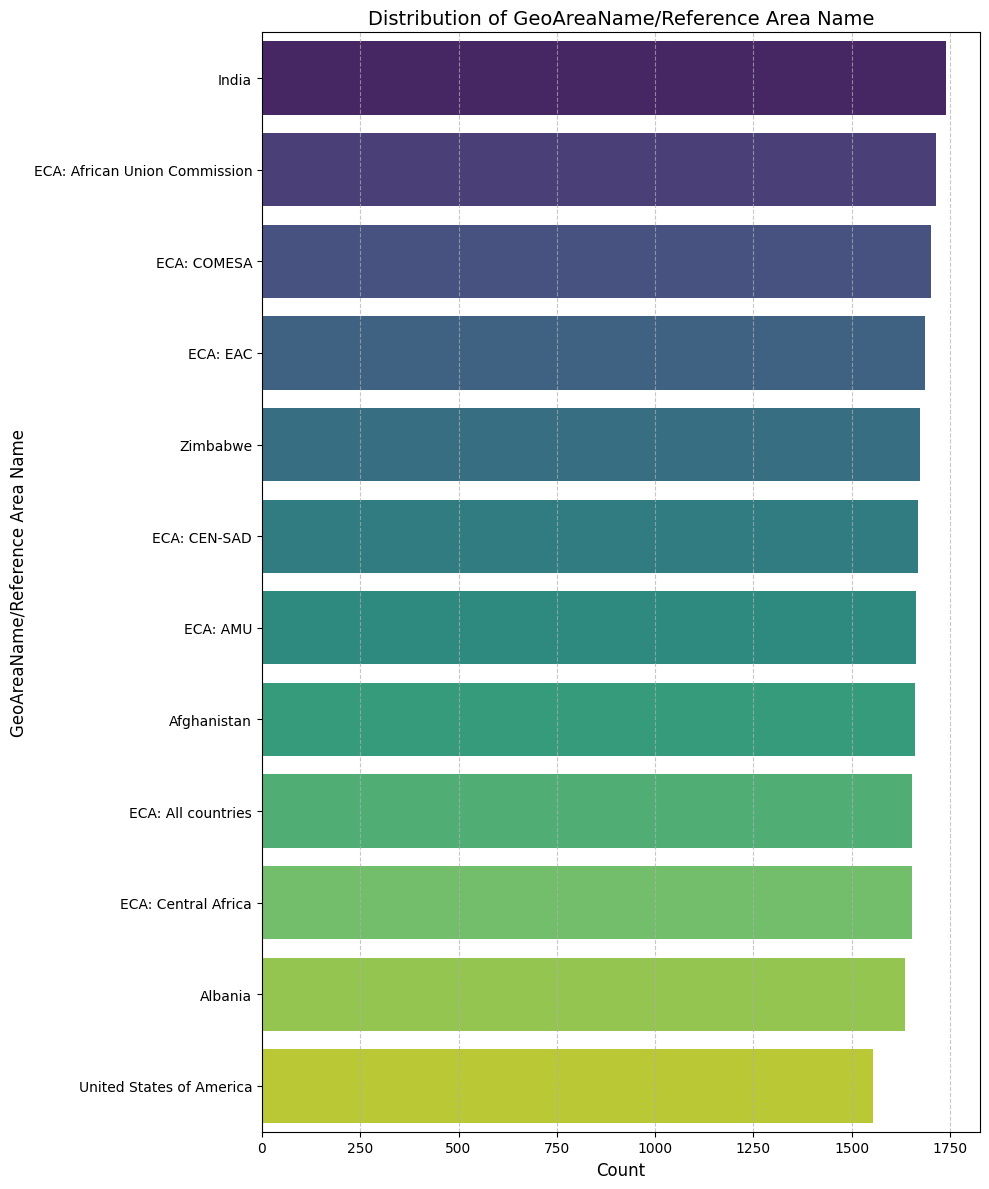

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
categories = np.array(['ECA: African Union Commission', 'ECA: All countries', 
                       'ECA: AMU', 'ECA: CEN-SAD', 'ECA: Central Africa', 'ECA: COMESA',
                       'ECA: EAC', 'Afghanistan', 'Albania', 'India', 'United States of America', 
                       'Zimbabwe'])  # Use a subset of categories for clarity
n_data_points = 20000
geo_area_names = np.random.choice(categories, n_data_points)
graph_data = pd.DataFrame({'GeoAreaName/Reference Area Name': geo_area_names})

# Count the occurrences of each category
counts = graph_data['GeoAreaName/Reference Area Name'].value_counts()

# Sort by counts for better visualization
counts = counts.sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 12))
sns.barplot(
    x=counts.values,
    y=counts.index,
    palette='viridis'
)

# Add labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('GeoAreaName/Reference Area Name', fontsize=12)
plt.title('Distribution of GeoAreaName/Reference Area Name', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


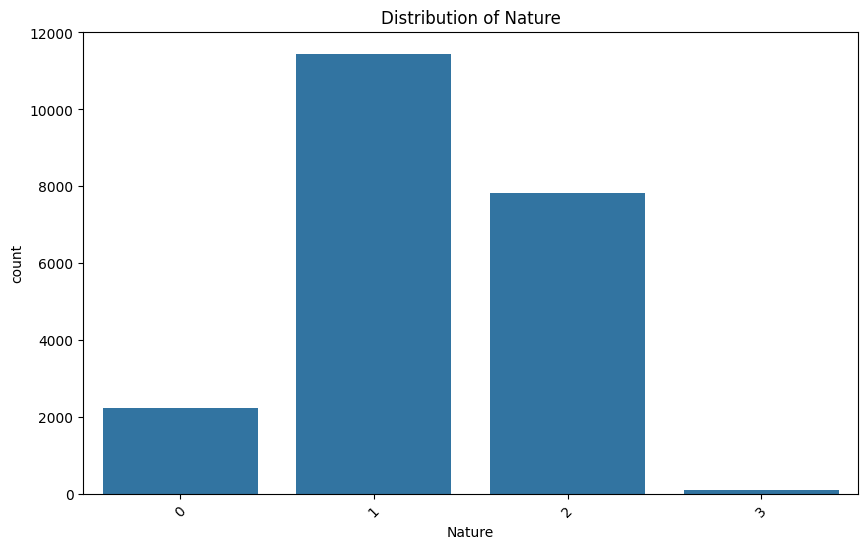

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='Nature')
plt.title('Distribution of Nature')
plt.xticks(rotation=45)
plt.show()


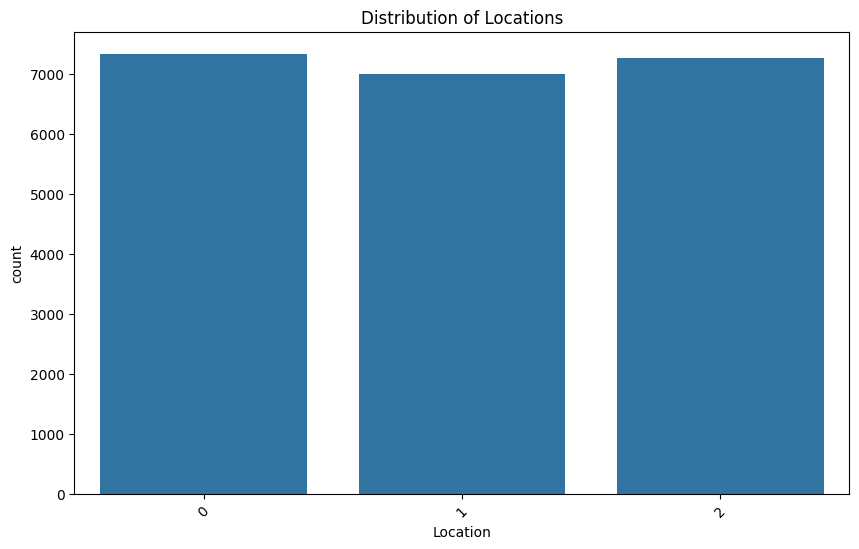

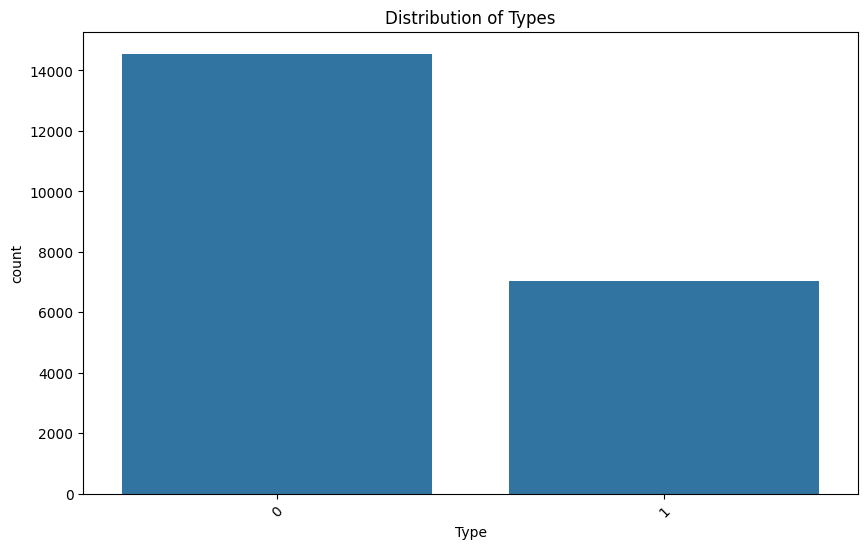

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='Location')
plt.title('Distribution of Locations')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='Type')
plt.title('Distribution of Types')
plt.xticks(rotation=45)
plt.show()


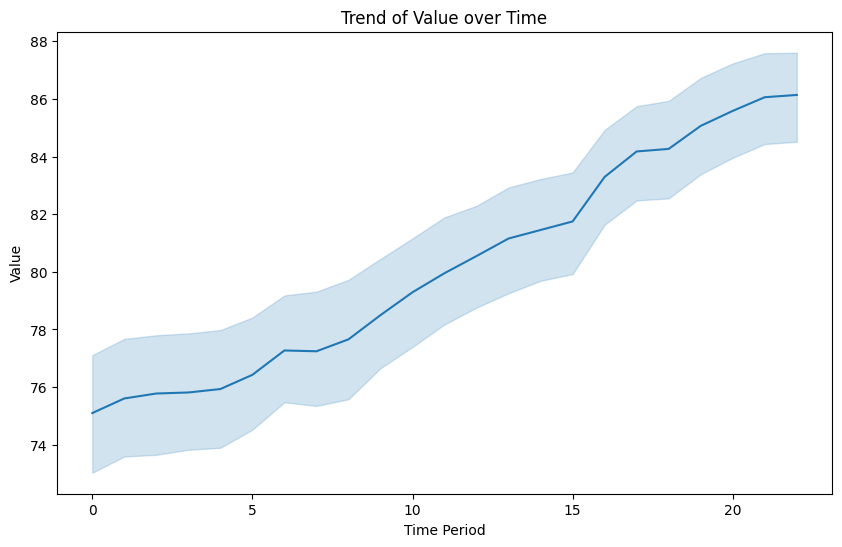

In [16]:
# Assuming TimePeriod is numeric or can be converted to a time format
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_data, x='TimePeriod', y='Value')
plt.title('Trend of Value over Time')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.show()

# EDA 2.0

In [17]:
data.sheet_names

['Note on Sources',
 'UN reporting',
 'UN reporting source note',
 'ea_total_rate_deficit',
 'ea_urban_rate_deficit',
 'ea_rural_rate_deficit',
 'ea_total_rate_deficit-REFERENCE']

In [18]:
ea_total_rate_deficit = data.parse('ea_total_rate_deficit', usecols=list(range(49)))
ea_total_rate_deficit

,Country/Regional and global averages,Region,2000,2001,2002,2003,2004,2005,2006,2007,...,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,Afghanistan,Central Asia and Southern Asia,4.446891,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,...,1.008029e+07,3.435202e+06,9.619747e+06,7.966328e+05,8.197986e+05,2.410000e+06,8.686985e+05,8.963613e+05,9.222876e+05,6.045929e+06
1,Albania,Northern America and Europe,99.430855,99.421989,99.404579,99.385628,99.372139,99.371124,99.389366,99.428452,...,3.175563e+03,1.444552e+03,5.761406e+02,3.163711e+03,3.160803e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,Algeria,Western Asia and Northern Africa,98.640030,98.637970,98.627357,98.615211,98.608528,98.614319,98.700000,98.685249,...,3.085927e+05,2.811851e+05,2.545814e+05,2.284445e+05,1.933329e+05,1.518843e+05,2.135268e+05,1.221979e+05,9.373393e+04,7.095159e+04
3,American Samoa,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Andorra,Northern America and Europe,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Western Asia and Northern Africa,NaN,88.073284,88.650167,88.580416,89.260560,89.133464,89.697461,91.420104,89.862460,...,3.231626e+07,3.501580e+07,3.479727e+07,3.347274e+07,2.949568e+07,3.627430e+07,3.154637e+07,3.081990e+07,3.024835e+07,2.988148e+07
225,Sub-Saharan Africa,NaN,25.798302,26.012223,27.219305,29.540140,29.311852,29.274155,31.168640,32.533935,...,5.728383e+08,5.860097e+08,5.947437e+08,5.639254e+08,5.804772e+08,5.677724e+08,5.749707e+08,5.756052e+08,5.666395e+08,5.712388e+08
226,Oceania,NaN,81.595715,81.466043,81.369678,81.243673,81.109301,81.017766,80.398437,80.840325,...,7.429488e+06,7.494825e+06,7.602015e+06,8.186205e+06,7.800237e+06,8.208796e+06,7.681359e+06,8.099672e+06,8.236045e+06,8.547971e+06
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Dropping null values
ea_total_rate_deficit.dropna(inplace=True)
ea_total_rate_deficit.isna().sum()


Country/Regional and global averages    0
Region                                  0
2000                                    0
2001                                    0
2002                                    0
2003                                    0
2004                                    0
2005                                    0
2006                                    0
2007                                    0
2008                                    0
2009                                    0
2010                                    0
2011                                    0
2012                                    0
2013                                    0
2014                                    0
2015                                    0
2016                                    0
2017                                    0
2018                                    0
2019                                    0
2020                                    0
2021                              

In [20]:
unique_entries(ea_total_rate_deficit)

Number of unique entries in: 

Country/Regional and global averages : 214
Region : 7
2000 : 151
2001 : 153
2002 : 150
2003 : 157
2004 : 157
2005 : 157
2006 : 150
2007 : 146
2008 : 144
2009 : 142
2010 : 141
2011 : 140
2012 : 135
2013 : 137
2014 : 128
2015 : 125
2016 : 122
2017 : 112
2018 : 112
2019 : 105
2020 : 102
2021 : 90
2022 : 80
2022 data sources : 5
2000.1 : 153
2001.1 : 154
2002.1 : 152
2003.1 : 159
2004.1 : 160
2005.1 : 159
2006.1 : 153
2007.1 : 149
2008.1 : 146
2009.1 : 146
2010.1 : 141
2011.1 : 144
2012.1 : 138
2013.1 : 137
2014.1 : 129
2015.1 : 128
2016.1 : 127
2017.1 : 117
2018.1 : 119
2019.1 : 111
2020.1 : 106
2021.1 : 91
2022.1 : 82


In [49]:
# Label Encoding the columns

columns_to_encode_2 = ['2022 data sources', 'Region', 'Country/Regional and global averages']

label_encoders_2 = encode_columns(ea_total_rate_deficit, columns_to_encode_2)
ea_total_rate_deficit.head()

,Country/Regional and global averages,Region,2000,2001,2002,2003,2004,2005,2006,2007,...,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,0,0,4.446891,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,...,1.008029e+07,3.435202e+06,9.619747e+06,7.966328e+05,8.197986e+05,2.410000e+06,8.686985e+05,8.963613e+05,9.222876e+05,6.045929e+06
1,1,3,99.430855,99.421989,99.404579,99.385628,99.372139,99.371124,99.389366,99.428452,...,3.175563e+03,1.444552e+03,5.761406e+02,3.163711e+03,3.160803e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2,6,98.640030,98.637970,98.627357,98.615211,98.608528,98.614319,98.700000,98.685249,...,3.085927e+05,2.811851e+05,2.545814e+05,2.284445e+05,1.933329e+05,1.518843e+05,2.135268e+05,1.221979e+05,9.373393e+04,7.095159e+04
4,3,3,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,4,5,24.238865,20.000000,26.320255,27.355137,28.395485,29.448309,30.520388,37.500000,...,1.610703e+07,1.844727e+07,1.631408e+07,1.697243e+07,1.724724e+07,1.710975e+07,1.758939e+07,1.773199e+07,1.786472e+07,1.833932e+07


In [54]:

access_percentage = ea_total_rate_deficit.iloc[:, 3:25]
without_access = ea_total_rate_deficit.iloc[:, 27:49]

access_percentage['Country'] = ea_total_rate_deficit['Country/Regional and global averages']
without_access['Country'] = ea_total_rate_deficit['Country/Regional and global averages']


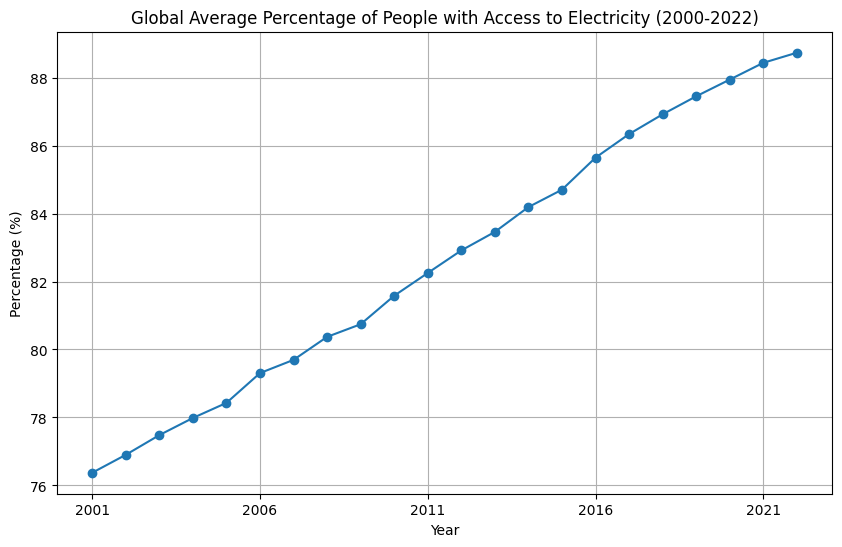

In [55]:
# Calculate global average for each year
global_avg = access_percentage.drop(columns=['Country']).mean()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
global_avg.plot(kind='line', marker='o')
plt.title('Global Average Percentage of People with Access to Electricity (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid()
plt.show()
